In [54]:


"""
Our analysis will focus on the long-term impact on the Canadian economy
regarding the cost of children/minors missing out on school, or getting bad starts on their school year.
This analysis is based on a study from the World Bank in May 2020 that focused on similar factors we'll
be highlighting today
Lost Wages - the COVID-19 Cost of School Closures
G. Psacharopoulos, V. Collis, H.A. Patrinos & E. Vegas
http://documents1.worldbank.org/curated/en/702401598463119393/pdf/Lost-Wages-The-COVID-19-Cost-of-School-Closures.pdfhttp://documents1.worldbank.org/curated/en/702401598463119393/pdf/Lost-Wages-The-COVID-19-Cost-of-School-Closures.pdf

This approach relies on Human Capital Theory, where it is stipulated that investments of time and money
on education have a Human Capital building effect similar if not identical to the effect of investing
in real-physical assets such as infrastructure.


To narrow down our sample of study to model the simulation, we'll be using survey data from Abacus that studied the 
month of September 2020 in Canada, to estimate how many students missed close to a month of school, or had
sub-par educational support from schools due to various pandemic factors, during a school years' most important 
month.
"""



"\nOur analysis will focus on the long-term impact on the Canadian economy\nregarding the cost of children/minors missing out on school, or getting bad starts on their school year.\nThis analysis is based on a study from the World Bank in May 2020 that focused on similar factors we'll\nbe highlighting today\nLost Wages - the COVID-19 Cost of School Closures\nG. Psacharopoulos, V. Collis, H.A. Patrinos & E. Vegas\nhttp://documents1.worldbank.org/curated/en/702401598463119393/pdf/Lost-Wages-The-COVID-19-Cost-of-School-Closures.pdfhttp://documents1.worldbank.org/curated/en/702401598463119393/pdf/Lost-Wages-The-COVID-19-Cost-of-School-Closures.pdf\n\nThis approach relies on Human Capital Theory, where it is stipulated that investments of time and money\non education have a Human Capital building effect similar if not identical to the effect of investing\nin real-physical assets such as infrastructure.\n\n\nTo narrow down our sample of study to model the simulation, we'll be using survey da

In [95]:
import gdp as getgdp
import pop as getpop
import pandas as pd
import matplotlib.pyplot as plt


gdpdf = getgdp('All industries')
"""
We use the difference in seconds since the unix epoch
for our linear regression instead of timestamps
"""
gdpdf['ts'] = gdpdf['Period'].apply(
    lambda year: ((pd.to_datetime([year]) - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s'))[0].astype(float)
)
pop = getpop()
abacus = pd.read_csv('data/abacus-file.csv')

# plt.subplot(2,1,1)
# plt.plot(gdpdf.Period, gdpdf.Value)
# plt.title('GDP')
# plt.ylabel('millions')
# plt.show()
# plt.subplot(2,1,2)
# plt.plot(pop.Year, pop['All ages'])
# plt.title('Population')
# plt.ylabel('10x millions')
# plt.show()

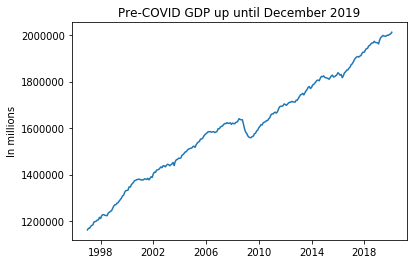

In [139]:
"""We study our samples pre-covid"""

date_range = 2015
start_of_pandemic='2020-03-01'
gdpdf_study = gdpdf[(gdpdf['Period'] < start_of_pandemic)]
plt.plot(gdpdf_study.Period, gdpdf_study.Value)
plt.title("Pre-COVID GDP up until December 2019")
plt.ylabel('In millions')
plt.show()



In [140]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
"""Now we apply a simple linear regression on the line"""
X = gdpdf_study.iloc[:, -1:].values
y = gdpdf_study.iloc[:, 1:-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

y_pred = linear_regressor.predict(X_test)

"""Df of dates from 12/2019 to 12/2022"""


'Df of dates from 12/2019 to 12/2022'

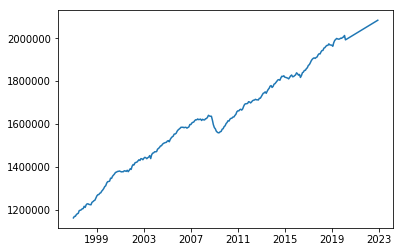

In [144]:
proj_df = pd.DataFrame({
    'Period': pd.date_range(start_of_pandemic,'2022-12-01', 
              freq='MS').tolist()
})
proj_df['ts'] = proj_df['Period'].apply(
    lambda year: ((pd.to_datetime([year]) - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s'))[0].astype(float)
)
Xpredicted = proj_df.iloc[:, -1:].values
proj_df['Value'] = linear_regressor.predict(Xpredicted)
proj_df = proj_df[['Period', 'Value', 'ts']]
# print(proj_df)
pred_normal_gdp = gdpdf_study.copy()
pred_normal_gdp = pred_normal_gdp.append(proj_df) #Our simulated dataframe in normal times up until 2022-12-01
# print(pred_normal_gdp.loc[(pred_normal_gdp['Period'] > '2019-08-01')])

plt.plot(pred_normal_gdp.Period, pred_normal_gdp.Value)

           Period      Value            ts  ValueP
237923 2020-01-01  2005755.0  1.577837e+09     NaN
238784 2020-02-01  2012862.0  1.580515e+09     NaN
239645 2020-03-01  1874623.0  1.583021e+09     NaN
240506 2020-04-01  1664431.0  1.585699e+09     NaN
241367 2020-05-01  1738493.0  1.588291e+09     NaN
242228 2020-06-01  1841947.0  1.590970e+09     NaN
243089 2020-07-01  1884717.0  1.593562e+09     NaN
243950 2020-08-01  1898677.0  1.596240e+09     NaN
244811 2020-09-01  1914802.0  1.598918e+09     NaN


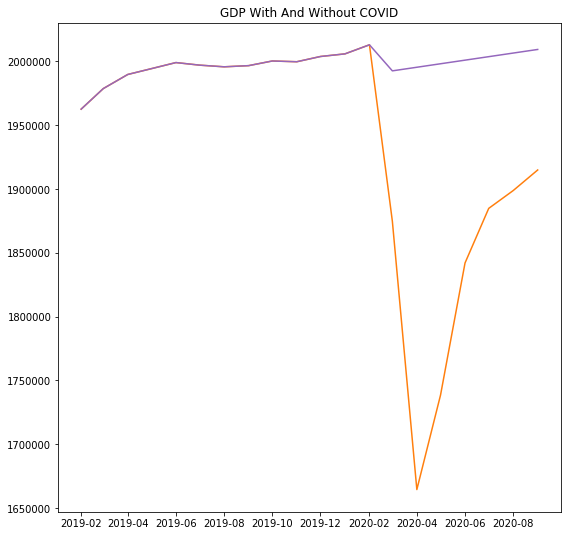

In [145]:
"""Let's now test the accuracy of our prediction over the months of 2020 that we do have"""
min_date = '2019-01-01'
temp = pred_normal_gdp.copy()
temp = temp.loc[(temp['Period'] > min_date)]
temp = temp.loc[(temp['Period'] < '2020-10-01')]
pre_covid = gdpdf[(gdpdf['Period'] > min_date)]

fig, ax = plt.subplots(figsize=(9, 9))
plt.title('GDP With And Without COVID')
ax.plot(pre_covid.Period, pre_covid.Value, 'C1', label='With COVID')
ax.plot(temp.Period, temp.Value, 'C4', label='Without COVID (Sim)')
# ax.legend()
print(predict_t)
plt.show()